<a href="https://colab.research.google.com/github/squeeko/GoogleCloud_IoT_ML_Kubernetes/blob/master/IoT_ML_TEMPLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Let's assess some data together!!

First things first, let's import some libraries and log into your Cloud Credentials.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
%load_ext google.cloud.bigquery

## Uncomment the below for Colab support
from google.colab import auth
auth.authenticate_user()

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


### This section will be used to query our data in small batches and evaluate its overall characteristics.

---

First, let's show averages, mins, and maxes across our dataset.

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_min_max
SELECT
  MIN(timestamp) as MinTime,
  MAX(timestamp) as MaxTime,
  MIN(temp) as MinTemp, 
  MAX(temp) as MaxTemp, 
  AVG(temp) as AvgTemp, 
  MIN(humidity) as MinHum,
  MAX(humidity) as MaxHum,
  AVG(humidity) as AvgHum,
  MIN(orientation_z) as MinZ,
  MAX(orientation_z) as MaxZ
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`

,MinTime,MaxTime,MinTemp,MaxTemp,AvgTemp,MinHum,MaxHum,AvgHum,MinZ,MaxZ
0,2001-01-01 01:24:02+00:00,2019-03-26 20:31:49.479726+00:00,-4223520.5,4251715.0,294.868889,-797306.0,791174.0,-33.778308,-100.0,251423.0


Select average temps and humidities across regions in a separate Dataframe.  We'll use this later to graph trends.

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_data_averagedbyregion
SELECT
  region, AVG(temp) as Temp, AVG(humidity) as Humidity
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`
GROUP BY
  region

,region,Temp,Humidity
0,US,64.757399,89.337817
1,NAM,76.577913,22.199670
2,EMEA,1015.833759,-238.667475
3,AMER,76.828612,35.145421
4,APAC,52.659100,28.791862
5,None,NaN,NaN


Select a sample dataset.  For our first attempt, we'll select data that's unfiltered so we can evaluate its characteristics holistically. Target <= 100000 rows for optimal plotting.

Note: Use RAND() and LIMIT for arbitrary data selection, use MOD() for consistent sampling

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_data_test_unfiltered
SELECT
  timestamp, city, region, temp, humidity, orientation_x, orientation_y, orientation_z
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`
WHERE
  MOD(ABS(FARM_FINGERPRINT(STRING(timestamp))), 1000) < 2
ORDER BY timestamp ASC

,timestamp,city,region,temp,humidity,orientation_x,orientation_y,orientation_z
0,2001-01-04 14:10:22+00:00,Manchester,EMEA,-527.67,31.56,325.870150,350.315640,24.546606
1,2001-01-04 14:10:22+00:00,Manchester,EMEA,-527.67,31.56,325.870150,350.315640,24.546606
2,2001-01-04 14:10:22+00:00,Manchester,EMEA,-527.67,31.56,325.870150,350.315640,24.546606
3,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
4,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
5,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
6,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
7,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
8,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
9,2001-02-01 05:55:06+00:00,Manchester,EMEA,93.24,35.41,358.304200,4.601294,133.793600


Let's describe our new dataframe and explore its characteristics.

In [0]:
iot_data_test_unfiltered.describe()

,temp,humidity,orientation_x,orientation_y,orientation_z
count,77706.000000,77706.000000,77706.000000,77706.000000,77706.000000
mean,278.724285,-54.605552,245.738032,171.321266,202.468272
std,11733.894301,6112.260005,2050.585989,2052.987711,2438.250251
min,-1000000.000000,-586019.700000,-100.000000,-100.000000,-100.000000
25%,32.000000,23.000000,0.865137,1.555992,61.371605
50%,85.980000,34.750000,270.000000,15.702382,137.471750
75%,89.980000,39.000000,357.896760,270.000000,247.538510
max,903013.700000,355120.700000,142797.000000,138518.000000,192455.000000


Let's print a random entry and see how it looks.

In [0]:
print(iot_data_test_unfiltered.iloc[205])

timestamp        2009-08-04 02:53:11+00:00
city                            Manchester
region                                EMEA
temp                                  93.7
humidity                             36.25
orientation_x                     0.848969
orientation_y                       7.7827
orientation_z                      108.956
Name: 205, dtype: object


Looks decent so far!  Let's visualize!

### Use the section below to plot data trends and track down anomalies

---

We'll use the below sections to plot some of the trends in our datasets and tune our BQ selections.  First things first, import the library.

In [0]:
%matplotlib inline

## Adjust DPI Below.  Not necessary for most Jupyter instances ##

#plt.rcParams['figure.dpi'] = 500

We'll set some grouping parameters below so we can assess categories across our scatter plots.  Region is the simplest way to isolate our data, so let's start there.

In [0]:
## Set Plotting Parameters for categorical grouping and plotting ##

iot_data_test_grouped_unfiltered = iot_data_test_unfiltered.groupby('region')
colors = {'NAM':'orange', 'AMER':'red', 'APAC':'blue', 'EMEA':'green', 'US':'black'}

**Plot Categorized Scatter by Region**

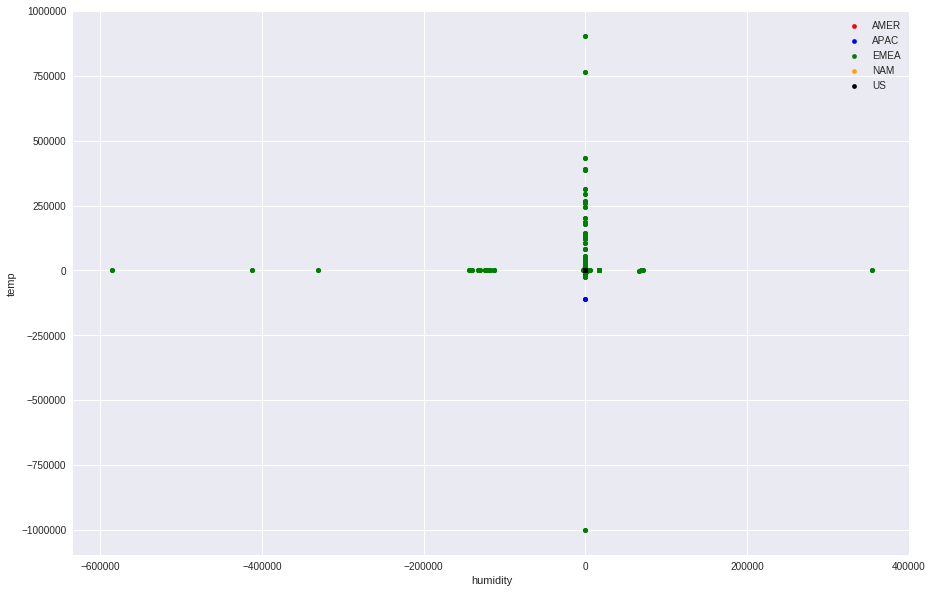

In [0]:
##Plot Grouped Categories

fig, ax = plt.subplots()
for key, group in iot_data_test_grouped_unfiltered:
    group.plot(figsize=(15,10), ax=ax, kind='scatter', x='humidity', y='temp', label=key, color=colors[key])

plt.show()

**WHOA.**

That doesn't look very useful.  It seems like our dataset has some pretty substantial anomalies in it (not uncommon for datasets that went through a variety of iterations in real-life scenarios.

Let's try and grab some data that's a little more realistic and set our temperatures and humidities within boundaries we know we can expect

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_data_test
SELECT
  timestamp, city, region, temp, humidity, orientation_x, orientation_y, orientation_z
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`
WHERE
  temp >= 0 AND temp <= 200 AND humidity >= -100 AND humidity <= 200
  AND MOD(ABS(FARM_FINGERPRINT(STRING(timestamp))), 1000) < 2
ORDER BY timestamp ASC

,timestamp,city,region,temp,humidity,orientation_x,orientation_y,orientation_z
0,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
1,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
2,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
3,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
4,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
5,2001-01-21 23:10:30+00:00,Manchester,EMEA,93.18,35.30,0.815111,7.677935,109.124870
6,2001-02-01 05:55:06+00:00,Manchester,EMEA,93.24,35.41,358.304200,4.601294,133.793600
7,2001-02-01 05:55:06+00:00,Manchester,EMEA,93.24,35.41,358.304200,4.601294,133.793600
8,2001-02-01 05:55:06+00:00,Manchester,EMEA,93.24,35.41,358.304200,4.601294,133.793600
9,2001-02-01 05:55:06+00:00,Manchester,EMEA,93.24,35.41,358.304200,4.601294,133.793600


Let's plot again.

In [0]:
iot_data_test_grouped = iot_data_test.groupby('region')
colors = {'NAM':'orange', 'AMER':'red', 'APAC':'blue', 'EMEA':'green', 'US':'black'}

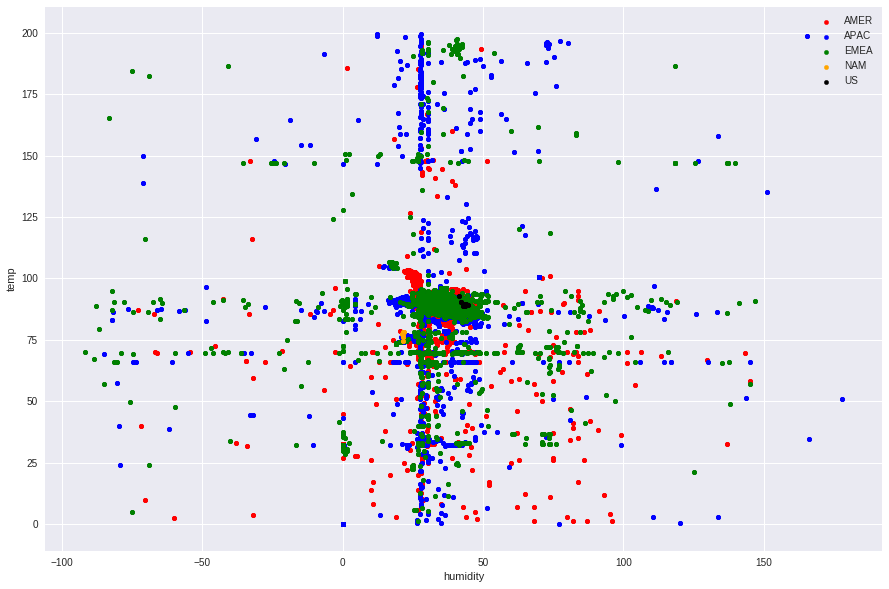

In [0]:
fig, ax = plt.subplots()
for key, group in iot_data_test_grouped:
    group.plot(figsize=(15,10), ax=ax, kind='scatter', x='humidity', y='temp', label=key, color=colors[key])

plt.show()

That looks much, much better!  It's still not perfect, though, so let's evaluate the temperature data by time (or index number, since we sorted in ascending order).

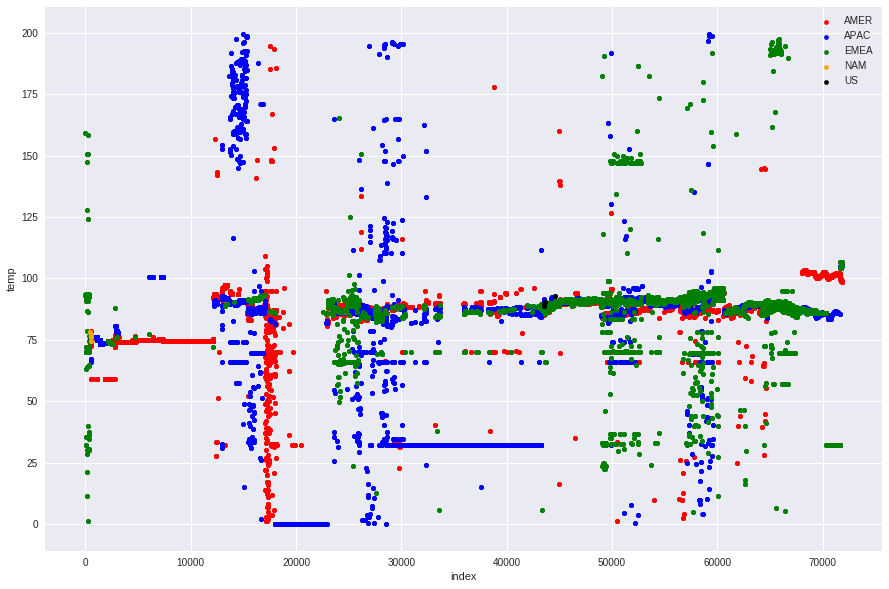

In [0]:
fig, ax = plt.subplots()
for key, group in iot_data_test_grouped:
    group.reset_index().plot(figsize=(15,10), ax=ax, kind='scatter', x='index', y='temp', label=key, color=colors[key])

plt.show()

Hm, that's odd.  There's a bit of a shift in the temperature characteristics around index 12000 or so.  Additionally, it looks like most of our temparatures after Index 12000 fall roughly between 75 and 100, and the rest are somewhat variable.  Since we want to train for optimal operating temperatures, let's keep 75 and 100 in mind to tighten up our training data a little later.

For now, though, let's see if we can figure out what's going on around Index 12000.  Let's see if that strange shift is mirrored in some of the other metrics.

Let's plot the orientations x, y, and z of our sensors against the index number.

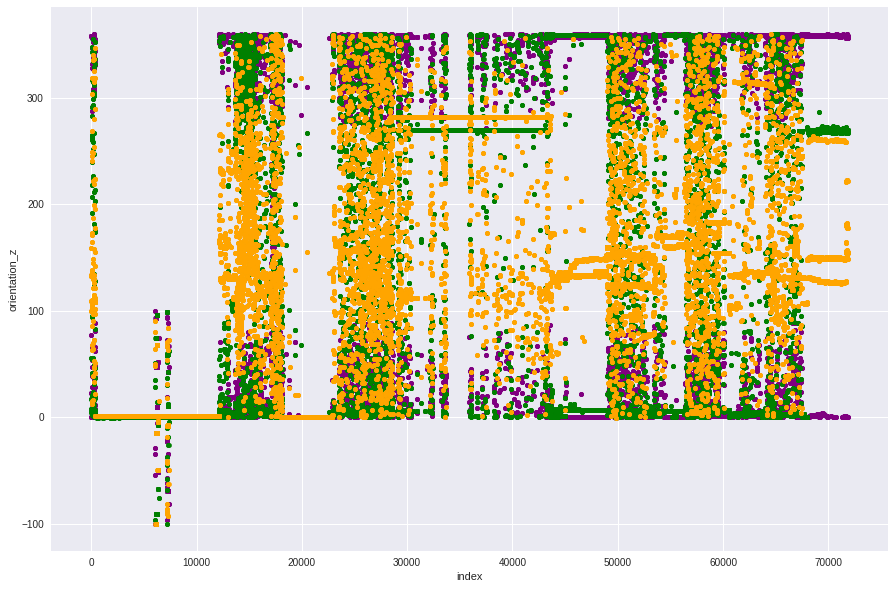

In [0]:
fig, ax = plt.subplots()
iot_data_test.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_x', color='purple');
iot_data_test.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_y', color='green');
iot_data_test.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_z', color='orange');
plt.show()

The shift seems to be there for both orientation and temperature. Let's try one more metric.

We're not using light level in our ML training, but our data warehouse tracks it anyway. Let's grab a dataframe that just stores light level and plot it by index.

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_data_lightlevel
SELECT
  lightLevel
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`
WHERE
  temp >= 0 AND temp <= 200 AND humidity >= -100 AND humidity <= 200
  AND MOD(ABS(FARM_FINGERPRINT(STRING(timestamp))), 1000) < 2
ORDER BY timestamp ASC

,lightLevel
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


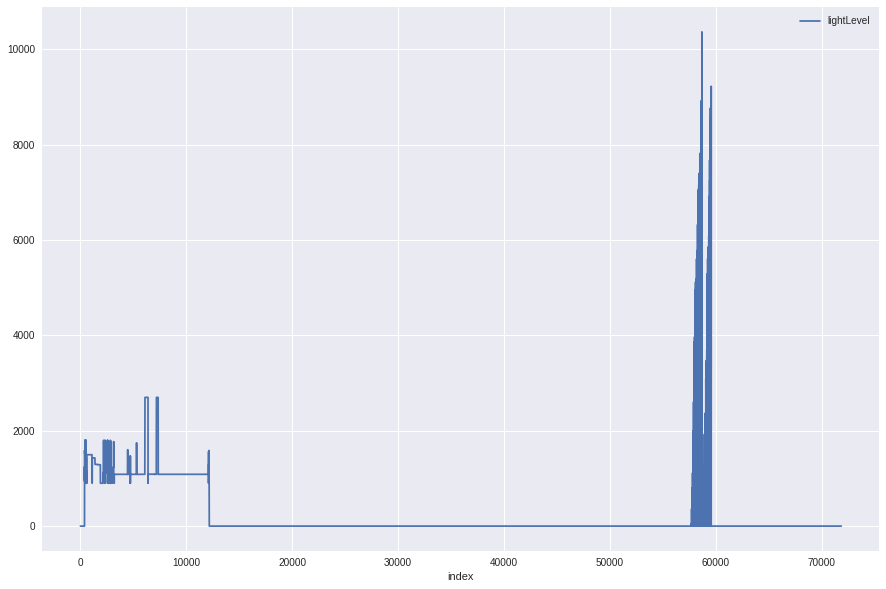

In [0]:
iot_data_lightlevel.reset_index().plot(kind='line', figsize=(15,10), x='index', y='lightLevel');

**What the heck is going on??!!**

Oh, yeah!!  We changed the sensors we were using in our environment a few months after we started, and the new sensors don't track light level.  This particular graph makes the shift much more apparent, as we hardcoded our light levels to '1' when we replaced sensors so we didn't have to alter our schema.  We can disregard the spikes around index 60000, as we were experimenting with virtualizing inputs within our new sensors, but decided against it.

Let's try and pin down when this change happened by plotting our index numbers against timestamps.

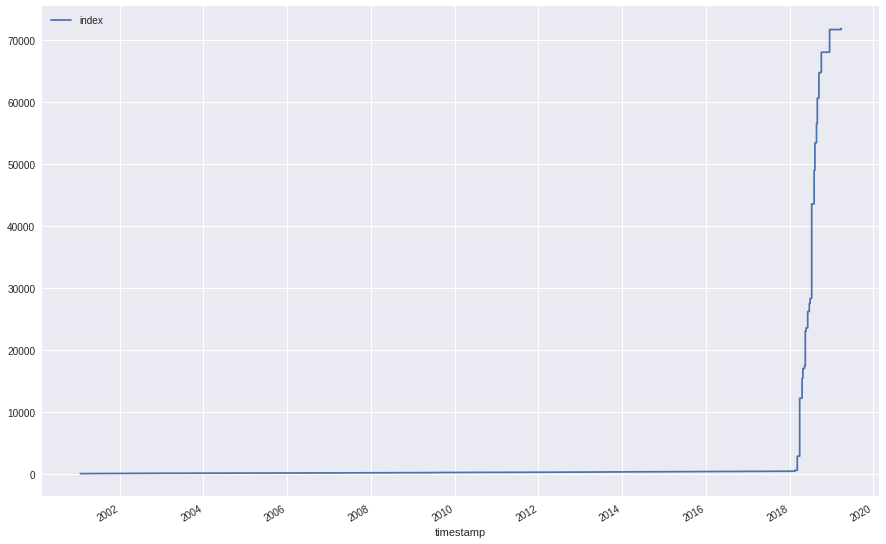

In [0]:
iot_data_test.reset_index().plot(kind='line', figsize=(15,10), x='timestamp', y='index');

Wow.  That's bizarre.  Looks like there's a bunch of anomalous timestamp data in our dataset.  Again, that's not uncommon as IoT solutions are deployed and streamlined.  As an example, sensors not attached to NTP systems can generate data stamped with their factory default datetimes.

Let's refine our dataset to start in 2018, as we know that's when we first deployed our IoT solution.

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_data_test_datetrimmed
SELECT
  timestamp, city, region, temp, humidity, orientation_x, orientation_y, orientation_z
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`
WHERE
  temp >= 0 AND temp <= 200 AND humidity >= -100 AND humidity <= 200
  AND MOD(ABS(FARM_FINGERPRINT(STRING(timestamp))), 1000) < 2
  AND timestamp >= '2018-01-01'
ORDER BY timestamp ASC

,timestamp,city,region,temp,humidity,orientation_x,orientation_y,orientation_z
0,2018-01-20 09:37:00+00:00,Manchester,EMEA,93.31,37.24,0.213592,6.432011,108.579810
1,2018-01-20 09:37:00+00:00,Manchester,EMEA,93.31,37.24,0.213592,6.432011,108.579810
2,2018-01-20 09:37:00+00:00,Manchester,EMEA,93.31,37.24,0.213592,6.432011,108.579810
3,2018-01-20 09:37:00+00:00,Manchester,EMEA,93.31,37.24,0.213592,6.432011,108.579810
4,2018-01-20 09:37:00+00:00,Manchester,EMEA,93.31,37.24,0.213592,6.432011,108.579810
5,2018-01-20 09:37:00+00:00,Manchester,EMEA,93.31,37.24,0.213592,6.432011,108.579810
6,2018-01-27 23:25:13+00:00,Manchester,EMEA,92.46,29.56,334.797000,352.883900,97.283550
7,2018-01-27 23:25:13+00:00,Manchester,EMEA,92.46,29.56,334.797000,352.883900,97.283550
8,2018-01-27 23:25:13+00:00,Manchester,EMEA,92.46,29.56,334.797000,352.883900,97.283550
9,2018-02-15 22:12:14.448071+00:00,Bogota,AMER,74.66,26.20,0.017582,-0.000977,0.977778


In [0]:
iot_data_test_grouped_datetrimmed = iot_data_test.groupby('region')
colors = {'NAM':'orange', 'AMER':'red', 'APAC':'blue', 'EMEA':'green', 'US':'black'}

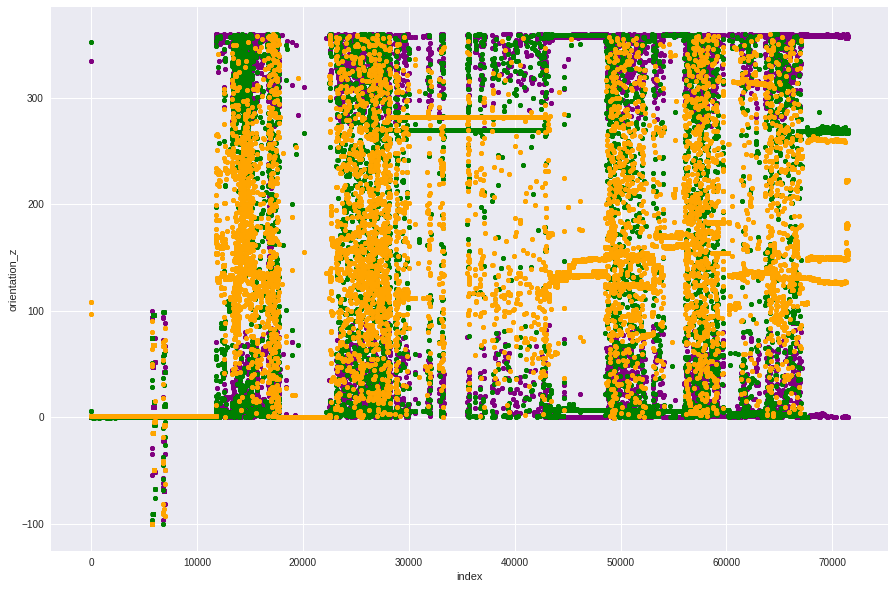

In [0]:
fig, ax = plt.subplots()
iot_data_test_datetrimmed.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_x', color='purple');
iot_data_test_datetrimmed.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_y', color='green');
iot_data_test_datetrimmed.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_z', color='orange');
plt.show()

Okay, our sensor change is still visible and is at roughly the same index.

So now let's plot our date to index graph one more time.

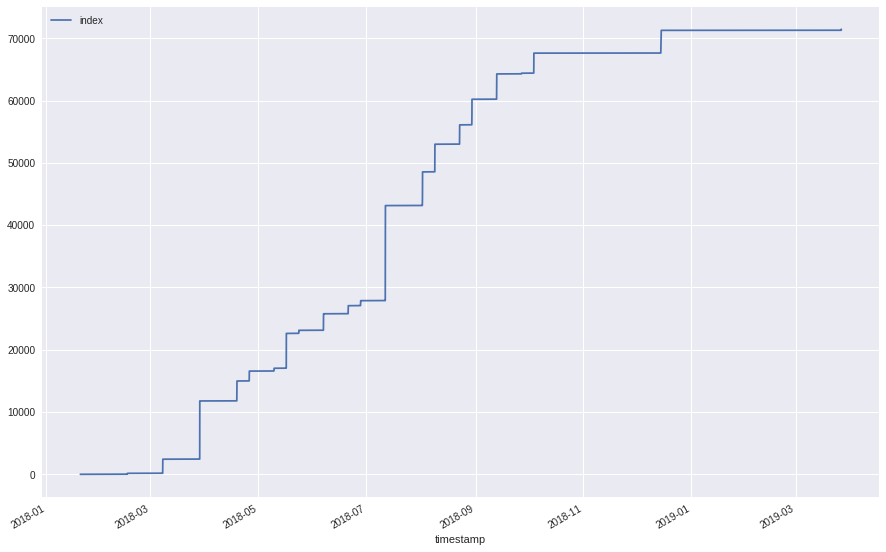

In [0]:
iot_data_test_datetrimmed.reset_index().plot(kind='line', figsize=(15,10), x='timestamp', y='index');

**Much better!!**

It looks like our Index ~12000 marker roughly correlates with April 2018.  Let's apply our tightened temperature readings of 75 and 100 that we isolated earlier with the new timestamps.  Let's also tighten up the humidity numbers a bit to match the percentage change in temperature.

In [0]:
%%bigquery --project qwiklabs-gcp-491ebef08e7bac4a iot_data_test_training
SELECT
  timestamp, city, region, temp, humidity, orientation_x, orientation_y, orientation_z
FROM
  `qwiklabs-gcp-491ebef08e7bac4a.bootcamp_data.aggregated_data`
WHERE
  temp >= 75 AND temp <= 100 AND humidity >= 25 AND humidity <= 50
  AND MOD(ABS(FARM_FINGERPRINT(STRING(timestamp))), 1000) < 2
  AND timestamp >= '2018-04-01'
ORDER BY timestamp ASC

,timestamp,city,region,temp,humidity,orientation_x,orientation_y,orientation_z
0,2018-04-18 21:17:32.516584+00:00,Quito,AMER,92.38,29.93,357.894560,35.473404,166.80249
1,2018-04-18 21:17:32.516584+00:00,Quito,AMER,92.38,29.93,357.894560,35.473404,166.80249
2,2018-04-18 21:17:32.516584+00:00,Quito,AMER,92.38,29.93,357.894560,35.473404,166.80249
3,2018-04-18 21:21:57.133832+00:00,Quito,AMER,91.87,28.39,351.993560,7.841512,265.56560
4,2018-04-18 21:21:57.133832+00:00,Quito,AMER,91.87,28.39,351.993560,7.841512,265.56560
5,2018-04-18 21:21:57.133832+00:00,Quito,AMER,91.87,28.39,351.993560,7.841512,265.56560
6,2018-04-18 21:22:08.920069+00:00,Quito,AMER,92.12,29.51,1.658343,4.597847,163.64888
7,2018-04-18 21:22:08.920069+00:00,Quito,AMER,92.12,29.51,1.658343,4.597847,163.64888
8,2018-04-18 21:22:08.920069+00:00,Quito,AMER,92.12,29.51,1.658343,4.597847,163.64888
9,2018-04-18 21:22:34.203984+00:00,Quito,AMER,91.90,29.29,1.263866,14.546231,189.90598


In [0]:
iot_data_test_grouped_training = iot_data_test_training.groupby('region')
colors = {'NAM':'orange', 'AMER':'red', 'APAC':'blue', 'EMEA':'green', 'US':'black'}

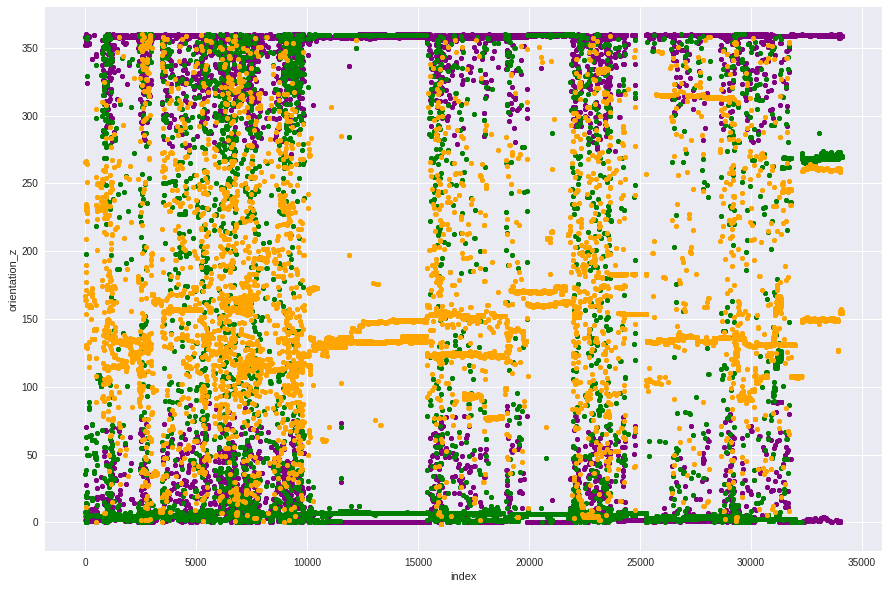

In [0]:
fig, ax = plt.subplots()
iot_data_test_training.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_x', color='purple');
iot_data_test_training.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_y', color='green');
iot_data_test_training.reset_index().plot(ax=ax, kind='scatter', figsize=(15,10), x='index', y='orientation_z', color='orange');
plt.show()

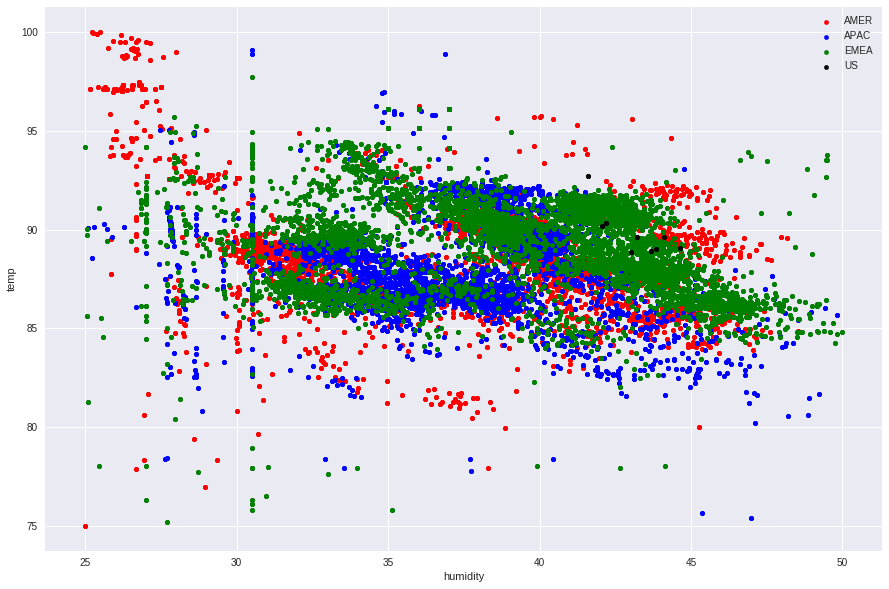

In [0]:
fig, ax = plt.subplots()
for key, group in iot_data_test_grouped_training:
    group.plot(figsize=(15,10), ax=ax, kind='scatter', x='humidity', y='temp', label=key, color=colors[key])

plt.show()

Now **THAT** looks like the type of data we can train against!  Just enough outliers to help the model generalize, but the data is tight enough that we can apply it to optimize against the sensors we have and generate smart predictions.

Let's capture the query for use later.

### Use the section below to capture the BQ query you'll use for ML training

---
Let's format it correctly for our Dataflow pipeline, and also extract the timestamps to separate fields so we can cross them for ML model creation.  Plus, let's parameterize our dataset for later use.

**THE BELOW QUERY WILL BE USED IN YOUR DATAFLOW PIPELINE TEMPLATE WHERE ## [[ INSERT YOUR QUERY HERE!! ]] ## IS WRITTEN**

```
SELECT
  EXTRACT(MONTH from timestamp) as month,
  EXTRACT(DAY from timestamp) day,
  EXTRACT(HOUR from timestamp) hour,
  EXTRACT(DAYOFWEEK from timestamp) dayofweek,
  city,
  region,
  temp,
  humidity,
  orientation_x,
  orientation_y,
  orientation_z
FROM
  `{}`
WHERE
  temp >= 75
  AND temp <= 100
  AND humidity >= 25
  AND humidity <= 50
  AND timestamp >= '2018-04-01'
```

